### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
company_data = pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### Data Understanding

In [3]:
company_data.Sales.min(),company_data.Sales.max()

(0.0, 16.27)

In [4]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

#### out output sales need to convert to categories

In [6]:
company_data['Sales_enc'] = pd.cut(company_data.Sales, 2, labels=range(1, 3))
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_enc
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,2
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,2
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,2
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,2
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,1
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,1
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,1


In [7]:
company_data_df = company_data.copy()
company_data_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_enc
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,2
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,2
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,2
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,2
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,1
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,1
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,1


In [8]:
del company_data_df['Sales']

In [9]:
company_data_df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_enc
0,138,73,11,276,120,Bad,42,17,Yes,Yes,2
1,111,48,16,260,83,Good,65,10,Yes,Yes,2
2,113,35,10,269,80,Medium,59,12,Yes,Yes,2
3,117,100,4,466,97,Medium,55,14,Yes,Yes,1
4,141,64,3,340,128,Bad,38,13,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,2
396,139,23,3,37,120,Medium,55,11,No,Yes,1
397,162,26,12,368,159,Medium,40,18,Yes,Yes,1
398,100,79,7,284,95,Bad,50,12,Yes,Yes,1


In [10]:
le = LabelEncoder()
company_data_df['ShelveLoc'] = le.fit_transform(company_data_df.ShelveLoc)
company_data_df['Urban'] = le.fit_transform(company_data_df.Urban)
company_data_df['US'] = le.fit_transform(company_data_df.US)
company_data_df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_enc
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,2
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,2
396,139,23,3,37,120,2,55,11,0,1,1
397,162,26,12,368,159,2,40,18,1,1,1
398,100,79,7,284,95,0,50,12,1,1,1


### Model Building

In [11]:
X = company_data_df.iloc[:,:-1]
y = company_data_df.iloc[:,-1:]

In [12]:
std_scale = StandardScaler()
scaled_X = std_scale.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X,columns=X.columns)
scaled_X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.850455,0.155361,0.657177,0.075819,0.177823,-1.570698,-0.699782,1.184449,0.646869,0.741881
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,-0.369399,0.721723,-1.490113,0.646869,0.741881
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.831899,0.350895,-0.725953,0.646869,0.741881
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.831899,0.103677,0.038208,0.646869,0.741881
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-1.570698,-0.947000,-0.343872,0.646869,-1.347925
...,...,...,...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,-0.369399,-1.256023,0.038208,0.646869,0.741881
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.831899,0.103677,-1.108033,-1.545908,0.741881
397,2.417512,-1.526151,0.807733,0.700853,1.827078,0.831899,-0.823391,1.566529,0.646869,0.741881
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,-1.570698,-0.205346,-0.725953,0.646869,0.741881


In [13]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.20,random_state=12, stratify=y)
X_train.shape,X_test.shape

((320, 10), (80, 10))

### Model training,  testing and evaluation

accuracy  :  0.85
recall    :  0.9375
precision :  0.8333333333333334
roc       :  0.828125


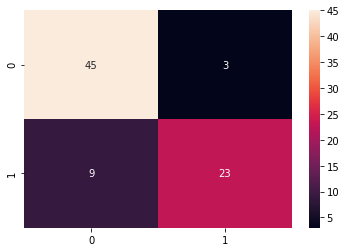

In [58]:
rand_forest_classifier = RandomForestClassifier(max_depth=9, criterion='entropy',random_state=13,class_weight={2:2})
rand_forest_classifier.fit(X_train,y_train)
y_pred_test = rand_forest_classifier.predict(X_test)
print('accuracy  : ', accuracy_score(y_test, y_pred_test))
print('recall    : ', recall_score(y_test, y_pred_test))
print('precision : ', precision_score(y_test, y_pred_test))
print('roc       : ', roc_auc_score(y_test, y_pred_test))
conf = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf,annot=True)
plt.show()

In [57]:
y_train.value_counts()

Sales_enc
1            193
2            127
dtype: int64

In [19]:
grid = GridSearchCV(estimator=rand_forest_classifier,param_grid={
    'criterion' : ['gini','entropy'],
    'max_depth' : range(0,10),
    })
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10)})

In [20]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [22]:
grid.best_score_

0.796875

#### BOSERVATION
WE GOT OUT MODEL AT 85% ACCURACY